In [1]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import yfinance as yf

symbol = 'USDJPY=X'
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='2y', interval='1wk')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-12-26 00:00:00+00:00,132.764008,134.395004,131.110001,131.110001,0,0.0,0.0
2023-01-02 00:00:00+00:00,130.845001,134.740997,129.533997,132.080002,0,0.0,0.0
2023-01-09 00:00:00+00:00,131.862000,132.854004,127.468002,127.870003,0,0.0,0.0
2023-01-16 00:00:00+00:00,128.026001,131.559006,127.253998,129.550003,0,0.0,0.0
2023-01-23 00:00:00+00:00,129.384995,131.069000,129.035004,129.869995,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-11-25 00:00:00+00:00,154.145996,154.695999,149.589996,149.750000,0,0.0,0.0
2024-12-02 00:00:00+00:00,149.815994,151.216995,148.651001,149.979996,0,0.0,0.0
2024-12-09 00:00:00+00:00,149.931000,153.850006,149.697006,153.729996,0,0.0,0.0


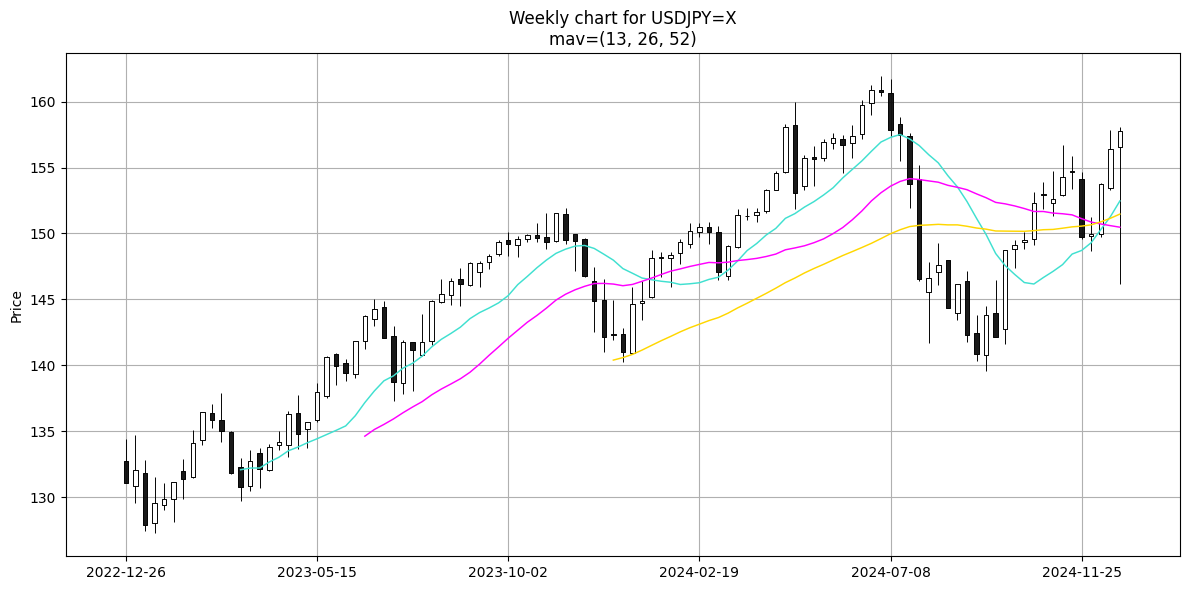

In [2]:
fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

mpf.plot(
    df, type='candle', style='default',
    mav=(13, 26, 52),
    volume=False,
    datetime_format='%Y-%m-%d',
    xrotation=0,
    ax=ax,
)
ax.set_title('Weekly chart for %s\nmav=(13, 26, 52)' % symbol)
ax.grid()

plt.tight_layout()
plt.savefig('weekly_chart_exchange.png')
plt.show()

In [3]:
df.tail(1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-12-23 00:00:00+00:00,156.533005,158.074997,146.201996,157.772003,0,0.0,0.0


In [4]:
df.tail(2)['Close']

Date
2024-12-16 00:00:00+00:00    156.440002
2024-12-23 00:00:00+00:00    157.772003
Name: Close, dtype: float64

In [5]:
df.tail(2)['Close'].diff()

Date
2024-12-16 00:00:00+00:00         NaN
2024-12-23 00:00:00+00:00    1.332001
Name: Close, dtype: float64

In [6]:
df['Close'].rolling(26).mean()

Date
2022-12-26 00:00:00+00:00           NaN
2023-01-02 00:00:00+00:00           NaN
2023-01-09 00:00:00+00:00           NaN
2023-01-16 00:00:00+00:00           NaN
2023-01-23 00:00:00+00:00           NaN
                                ...    
2024-11-25 00:00:00+00:00    151.123078
2024-12-02 00:00:00+00:00    150.864231
2024-12-09 00:00:00+00:00    150.722693
2024-12-16 00:00:00+00:00    150.594616
2024-12-23 00:00:00+00:00    150.475077
Name: Close, Length: 105, dtype: float64

In [7]:
df['Close'].rolling(52).mean()

Date
2022-12-26 00:00:00+00:00           NaN
2023-01-02 00:00:00+00:00           NaN
2023-01-09 00:00:00+00:00           NaN
2023-01-16 00:00:00+00:00           NaN
2023-01-23 00:00:00+00:00           NaN
                                ...    
2024-11-25 00:00:00+00:00    150.557846
2024-12-02 00:00:00+00:00    150.656327
2024-12-09 00:00:00+00:00    150.879596
2024-12-16 00:00:00+00:00    151.149403
2024-12-23 00:00:00+00:00    151.471557
Name: Close, Length: 105, dtype: float64